<a href="https://colab.research.google.com/github/anakhashibu1999/ML-projects/blob/main/CC_GENERAL_agglomerative_and_k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
#df=pd.read_csv('/content/CC GENERAL.csv') complete rows not needed
X=pd.read_csv('/content/CC GENERAL.csv',nrows=500)
X

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,C10517,12478.172860,1.000000,174.00,174.00,0.00,3269.418821,0.250000,0.250000,0.000000,0.666667,21,3,14000,3251.190662,3872.099498,0.000000,12
496,C10518,2061.279370,1.000000,0.00,0.00,0.00,554.115230,0.000000,0.000000,0.000000,0.250000,3,0,4500,552.713988,585.776445,0.000000,12
497,C10519,1556.376158,1.000000,0.00,0.00,0.00,655.037683,0.000000,0.000000,0.000000,0.583333,16,0,1700,1076.722225,1206.741644,0.000000,12
498,C10520,126.207012,0.636364,913.00,0.00,913.00,0.000000,0.416667,0.000000,0.333333,0.000000,0,5,7500,1718.487894,140.181283,1.000000,12


In [ ]:
X.isna().sum()

CUST_ID                              0
BALANCE                              0
BALANCE_FREQUENCY                    0
PURCHASES                            0
ONEOFF_PURCHASES                     0
INSTALLMENTS_PURCHASES               0
CASH_ADVANCE                         0
PURCHASES_FREQUENCY                  0
ONEOFF_PURCHASES_FREQUENCY           0
PURCHASES_INSTALLMENTS_FREQUENCY     0
CASH_ADVANCE_FREQUENCY               0
CASH_ADVANCE_TRX                     0
PURCHASES_TRX                        0
CREDIT_LIMIT                         0
PAYMENTS                             0
MINIMUM_PAYMENTS                    37
PRC_FULL_PAYMENT                     0
TENURE                               0
dtype: int64

In [ ]:
m=X['MINIMUM_PAYMENTS'].mean()
m

1259.0084435421165

In [ ]:
X['MINIMUM_PAYMENTS'].fillna(m,inplace=True)

In [ ]:
X.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [ ]:
X.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                          int64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [ ]:
X.drop('CUST_ID',axis=1,inplace=True)

In [ ]:
X.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import normalize
X_nor=normalize(X)
X_nor

array([[3.93529208e-02, 7.87219116e-04, 9.17897286e-02, ...,
        1.34230246e-01, 0.00000000e+00, 1.15458778e-02],
       [2.93875725e-01, 8.34231054e-05, 0.00000000e+00, ...,
        9.84037362e-02, 2.03922922e-05, 1.10118488e-03],
       [3.10797802e-01, 1.24560826e-04, 9.63066935e-02, ...,
        7.81351110e-02, 0.00000000e+00, 1.49472991e-03],
       ...,
       [5.38369652e-01, 3.45912297e-04, 0.00000000e+00, ...,
        4.17426774e-01, 0.00000000e+00, 4.15094756e-03],
       [1.61716052e-02, 8.15408528e-05, 1.16987759e-01, ...,
        1.79622062e-02, 1.28135553e-04, 1.53762663e-03],
       [6.01358362e-01, 2.38942111e-04, 1.44947064e-01, ...,
        3.20785071e-01, 0.00000000e+00, 2.86730534e-03]])

In [ ]:
X_new=pd.DataFrame(X_nor,columns=X.columns)
X_new

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.039353,0.000787,0.091790,0.000000,0.091790,0.000000,0.000160,0.000000,0.000080,0.000000,0.000000,0.001924,0.962156,0.194165,0.134230,0.000000,0.011546
1,0.293876,0.000083,0.000000,0.000000,0.000000,0.591240,0.000000,0.000000,0.000000,0.000023,0.000367,0.000000,0.642358,0.376516,0.098404,0.000020,0.001101
2,0.310798,0.000125,0.096307,0.096307,0.000000,0.000000,0.000125,0.000125,0.000000,0.000000,0.000000,0.001495,0.934206,0.077485,0.078135,0.000000,0.001495
3,0.206488,0.000079,0.185715,0.185715,0.000000,0.025496,0.000010,0.000010,0.000000,0.000010,0.000124,0.000124,0.929193,0.000000,0.155982,0.000000,0.001487
4,0.504284,0.000617,0.009867,0.009867,0.000000,0.000000,0.000051,0.000051,0.000000,0.000000,0.000000,0.000617,0.740040,0.418329,0.150963,0.000000,0.007400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.633468,0.000051,0.008833,0.008833,0.000000,0.165976,0.000013,0.000013,0.000000,0.000034,0.001066,0.000152,0.710725,0.165050,0.196571,0.000000,0.000609
496,0.408557,0.000198,0.000000,0.000000,0.000000,0.109829,0.000000,0.000000,0.000000,0.000050,0.000595,0.000000,0.891925,0.109551,0.116104,0.000000,0.002378
497,0.538370,0.000346,0.000000,0.000000,0.000000,0.226586,0.000000,0.000000,0.000000,0.000202,0.005535,0.000000,0.588051,0.372451,0.417427,0.000000,0.004151
498,0.016172,0.000082,0.116988,0.000000,0.116988,0.000000,0.000053,0.000000,0.000043,0.000000,0.000000,0.000641,0.961017,0.220199,0.017962,0.000128,0.001538


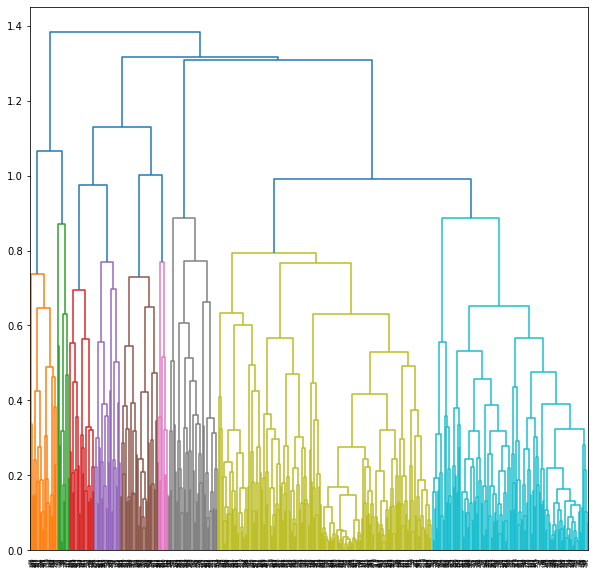

In [ ]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
dend=shc.dendrogram(shc.linkage(X_new,method='complete'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='complete')
y=cluster.fit_predict(X_new)
y

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 1, 0, 0, 2, 0, 0, 2, 0, 0, 1, 1, 0,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 2, 2, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1, 2, 0, 2,
       2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2,
       1, 0, 0, 0, 2, 0, 1, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       2, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 1, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0,

In [ ]:
X_new['cluster']=y
X_new

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,0.039353,0.000787,0.091790,0.000000,0.091790,0.000000,0.000160,0.000000,0.000080,0.000000,0.000000,0.001924,0.962156,0.194165,0.134230,0.000000,0.011546,0
1,0.293876,0.000083,0.000000,0.000000,0.000000,0.591240,0.000000,0.000000,0.000000,0.000023,0.000367,0.000000,0.642358,0.376516,0.098404,0.000020,0.001101,0
2,0.310798,0.000125,0.096307,0.096307,0.000000,0.000000,0.000125,0.000125,0.000000,0.000000,0.000000,0.001495,0.934206,0.077485,0.078135,0.000000,0.001495,0
3,0.206488,0.000079,0.185715,0.185715,0.000000,0.025496,0.000010,0.000010,0.000000,0.000010,0.000124,0.000124,0.929193,0.000000,0.155982,0.000000,0.001487,0
4,0.504284,0.000617,0.009867,0.009867,0.000000,0.000000,0.000051,0.000051,0.000000,0.000000,0.000000,0.000617,0.740040,0.418329,0.150963,0.000000,0.007400,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.633468,0.000051,0.008833,0.008833,0.000000,0.165976,0.000013,0.000013,0.000000,0.000034,0.001066,0.000152,0.710725,0.165050,0.196571,0.000000,0.000609,0
496,0.408557,0.000198,0.000000,0.000000,0.000000,0.109829,0.000000,0.000000,0.000000,0.000050,0.000595,0.000000,0.891925,0.109551,0.116104,0.000000,0.002378,0
497,0.538370,0.000346,0.000000,0.000000,0.000000,0.226586,0.000000,0.000000,0.000000,0.000202,0.005535,0.000000,0.588051,0.372451,0.417427,0.000000,0.004151,0
498,0.016172,0.000082,0.116988,0.000000,0.116988,0.000000,0.000053,0.000000,0.000043,0.000000,0.000000,0.000641,0.961017,0.220199,0.017962,0.000128,0.001538,0


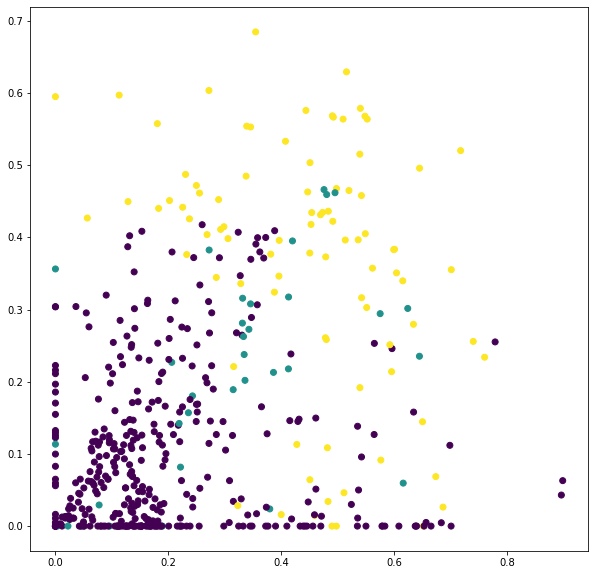

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(X_new['PAYMENTS'],X_new['PURCHASES'],c=cluster.labels_)

**k means**

In [ ]:
X=df.iloc[:,[3,4]]
X

,PURCHASES,ONEOFF_PURCHASES
0,95.40,0.00
1,0.00,0.00
2,773.17,773.17
3,1499.00,1499.00
4,16.00,16.00
...,...,...
8945,291.12,0.00
8946,300.00,0.00
8947,144.40,0.00
8948,0.00,0.00


In [ ]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3,init='k-means++',random_state=42)
km.fit(X_new)
y_pred=km.predict(X_new)
y_pred

array([1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 2, 1, 1, 0, 1, 1, 0, 1, 1, 2, 2, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 0, 1, 0, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 2, 0, 1, 0,
       0, 1, 1, 2, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       2, 1, 1, 1, 0, 1, 2, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 2, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 2, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,

In [ ]:
WCSS=[] #with in cluster sum of square
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++',random_state=42)
    km.fit(X_new)
    WCSS.append(km.inertia_)

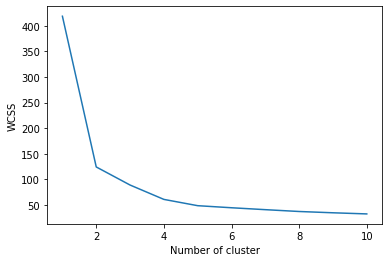

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),WCSS)
plt.xlabel("Number of cluster")
plt.ylabel("WCSS")
plt.show()